In [13]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('flights.csv')

In [15]:
df.sample(5)

,year,month,day,dep_delay,arr_delay,origin,dest,flight,tailnum,distance,air_time,carrier,name,date
111409,2013,2,1,-8.0,-12.0,EWR,STL,4099,N13538,872,142.0,EV,ExpressJet Airlines Inc.,2013-02-01
173500,2013,4,9,40.0,34.0,EWR,SAN,148,N33289,2425,326.0,UA,United Air Lines Inc.,2013-04-09
308140,2013,8,30,-7.0,-13.0,EWR,MSP,4667,N12142,1008,143.0,EV,ExpressJet Airlines Inc.,2013-08-30
333128,2013,9,26,8.0,-7.0,EWR,MIA,1680,N37409,1085,136.0,UA,United Air Lines Inc.,2013-09-26
38555,2013,10,13,-1.0,-5.0,LGA,ATL,2247,N913DE,762,104.0,DL,Delta Air Lines Inc.,2013-10-13


In [16]:
df.dtypes

year           int64
month          int64
day            int64
dep_delay    float64
arr_delay    float64
origin        object
dest          object
flight         int64
tailnum       object
distance       int64
air_time     float64
carrier       object
name          object
date          object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_delay  328521 non-null  float64
 4   arr_delay  327346 non-null  float64
 5   origin     336776 non-null  object 
 6   dest       336776 non-null  object 
 7   flight     336776 non-null  int64  
 8   tailnum    334264 non-null  object 
 9   distance   336776 non-null  int64  
 10  air_time   327346 non-null  float64
 11  carrier    336776 non-null  object 
 12  name       336776 non-null  object 
 13  date       336776 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 36.0+ MB


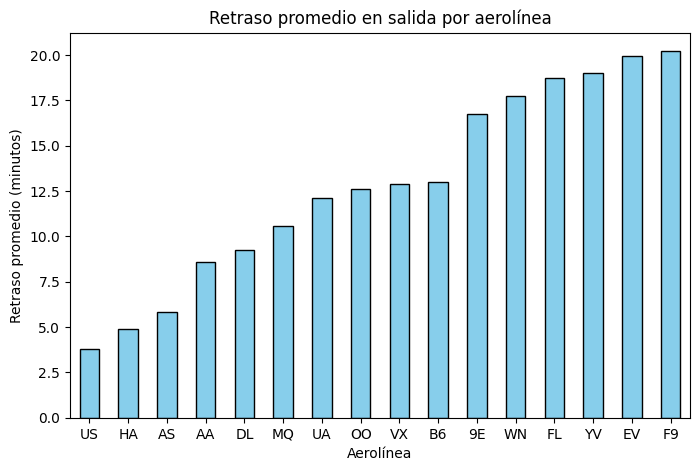

In [18]:
# Agrupar por aerolínea y calcular promedio de retraso en salida
avg_delay = df.groupby("carrier")["dep_delay"].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(8,5))
avg_delay.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Retraso promedio en salida por aerolínea")
plt.xlabel("Aerolínea")
plt.ylabel("Retraso promedio (minutos)")
plt.xticks(rotation=0)
plt.show()

In [19]:

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_columns)

# Check missing values in numerical columns specifically
print("\nMissing values in numerical columns:")
for col in numerical_columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values ({missing_count/len(df)*100:.2f}%)")


Numerical columns: ['year', 'month', 'day', 'dep_delay', 'arr_delay', 'flight', 'distance', 'air_time']

Missing values in numerical columns:
dep_delay: 8255 missing values (2.45%)
arr_delay: 9430 missing values (2.80%)
air_time: 9430 missing values (2.80%)


In [20]:
# Impute missing values in numerical columns with median
print("Before imputation - Missing values:")
print(df[numerical_columns].isnull().sum())

# Create a copy of the dataframe to preserve original data
df_imputed = df.copy()

# Impute missing values with median for each numerical column
for col in numerical_columns:
    if df_imputed[col].isnull().sum() > 0:
        median_value = df_imputed[col].median()
        df_imputed[col] = df_imputed[col].fillna(median_value)
        print(f"Imputed {col} with median: {median_value}")

print("\nAfter imputation - Missing values:")
print(df_imputed[numerical_columns].isnull().sum())


Before imputation - Missing values:
year            0
month           0
day             0
dep_delay    8255
arr_delay    9430
flight          0
distance        0
air_time     9430
dtype: int64
Imputed dep_delay with median: -2.0
Imputed arr_delay with median: -5.0
Imputed air_time with median: 129.0

After imputation - Missing values:
year         0
month        0
day          0
dep_delay    0
arr_delay    0
flight       0
distance     0
air_time     0
dtype: int64
